<a href="https://colab.research.google.com/github/veera37/data-science-assignments/blob/main/Clustering_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [292]:
#importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
crime =pd.read_csv('/content/crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [293]:
crime.shape

(50, 5)

In [294]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [295]:
#normalizing the data
def norm_func(i):
  X = (i-i.min())/(i.max()-i.min())
  return(X)

In [296]:
crime_norm = norm_func(crime.iloc[:,1:])
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [297]:
crime_norm_data = pd.concat([crime_norm,crime['Unnamed: 0']],axis=1)
crime_norm_data.head()

,Murder,Assault,UrbanPop,Rape,Unnamed: 0
0,0.746988,0.654110,0.440678,0.359173,Alabama
1,0.554217,0.746575,0.271186,0.961240,Alaska
2,0.439759,0.852740,0.813559,0.612403,Arizona
3,0.481928,0.496575,0.305085,0.315245,Arkansas
4,0.493976,0.791096,1.000000,0.860465,California


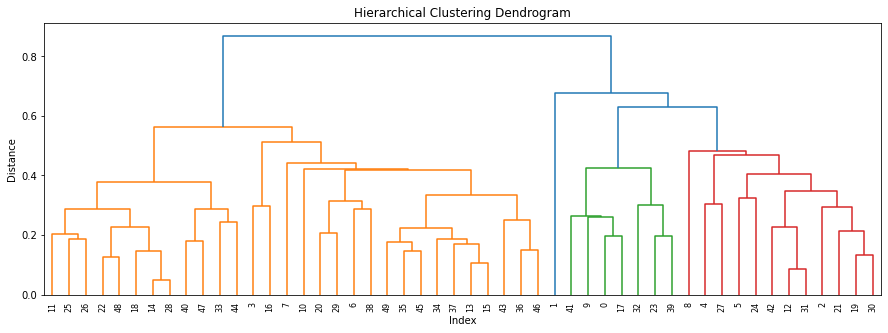

In [298]:
#Hirarchical clustering
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(crime_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()     

In [299]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(crime_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [300]:
crime.iloc[:,:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,4.870000,114.433333,63.633333,15.943333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714


In [301]:
crime['clust'].value_counts()

0    30
1    12
3     7
2     1
Name: clust, dtype: int64

In [302]:
import sklearn
sklearn.metrics.silhouette_score(crime_norm, cluster_labels)

0.3699239114027717

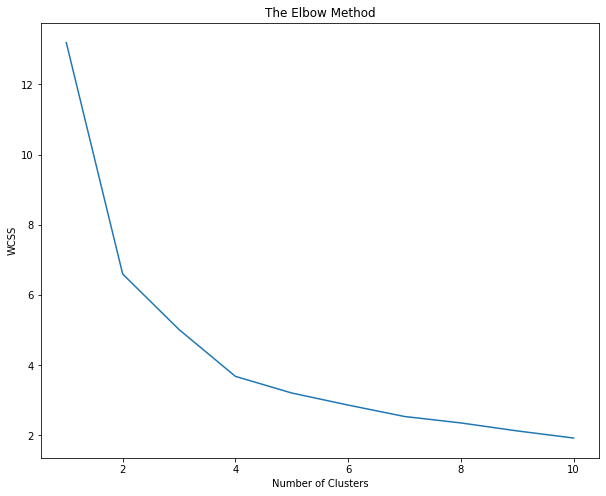

In [303]:
#kMeans clusteting
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(crime_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [304]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(crime_norm)

In [305]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([3, 2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 0, 2, 1, 0, 1, 0, 3, 0, 2, 1, 2,
       0, 3, 2, 0, 0, 2, 0, 1, 2, 2, 3, 0, 1, 1, 1, 1, 1, 3, 0, 3, 2, 1,
       0, 1, 1, 0, 0, 1], dtype=int32)

In [306]:
clf.cluster_centers_ 

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [307]:
clf.inertia_

3.6908204103921123

In [308]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
crime['clust']=md # creating a  new column and assigning it to new column 
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,3


In [309]:
crime.iloc[:,:].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,5.656250,138.875000,73.875000,18.781250
2,10.815385,257.384615,76.000000,33.192308
3,13.937500,243.625000,53.750000,21.412500


In [310]:
crime.clust.value_counts()

1    16
2    13
0    13
3     8
Name: clust, dtype: int64

Text(0.5, 1.0, 'Clusters using KMeans')

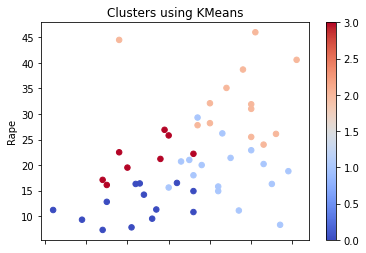

In [311]:
crime.plot(x="UrbanPop",y ="Rape",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [312]:
import sklearn
sklearn.metrics.silhouette_score(crime_norm, clf.labels_)

0.3349095719865253

In [313]:
##DBscan
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.25, min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1.25, min_samples=4)

In [314]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Hcluster is working better for the given dataset